(cap-subj-prop)=
# Pensare ad una proporzione in termini soggettivi

Obiettivo di questo Capitolo è introdurre l'inferenza bayesiana considerando il modello binomiale. Esamineremo prima il caso di una distribuzione a priori discreta; esamineremo poi il caso di una distribuzione a priori continua. Il materiale qui presentato segue molto da vicino il capitolo 7 del testo di {cite:t}`albert_2019prob`. 

## Inferenza bayesiana con una distribuzione a priori discreta 

Nei problemi tradizionali sulla teoria delle probabilità ci sono molti esempi che riguardano l'estrazione di palline colorate da un'urna. In questi esempi ci viene fornito il numero di palline di vari colori presenti nell'urna e ci viene chiesto di calcolare le probabilità di vari eventi. Ad esempio, in un'urna ci sono 40 palline bianche e 20 rosse. Se estrai due palline a caso, qual è la probabilità che entrambe siano bianche? 

L'approccio bayesiano considera uno scenario diverso, ovvero quello in cui non conosciamo le proporzioni delle palline colorate presenti nell'urna. Cioè, nell'esempio precedente, sappiamo solo che nell'urna ci sono due tipi di palline colorate, ma non sappiamo che 40 sono bianche (proporzione di bianco = $2/3$) e 20 sono rosse (proporzione di rosso = $1/3$). Ci poniamo la seguente domanda: è possibile inferire le proporzioni di palline nell'urna estraendo un campione di palline dall'urna e osservando i colori delle palline estratte? Espresso in questo modo, questo diventa un problema di inferenza statistica, perché stiamo cercando di inferire la proporzione $\theta$ della popolazione sulla base di un campione casuale. Per continuare con l'esempio precedente, quello che vogliamo fare è inferire $\theta$, ad esempio, la proporzione di palline rosse nell'urna, alla luce del numero di palline rosse e bianche nel campione.

Le proporzioni sono simili alle probabilità. Ricordiamo che sono state proposte tre diverse interpretazioni del concetto di probabilità.

-   Il punto di vista classico: è necessario enumerare tutti gli eventi elementari dello spazio campione nel quale ciascun risultato è ugualmente probabile.
-   Il punto di vista frequentista: è necessario ripetere l'esperimento esperimento casuale (cioè l'estrazione del campione) molte volte in condizioni identiche.
-   La visione soggettiva: è necessario esprimere la propria opinione sulla probabilità di un evento unico e irripetibile.

La visione classica non sembra potere funzionare qui, perché sappiamo solo che ci sono due tipi di palline colorate e che il numero totale di palline è 60. Anche se estraiamo un campione di 10 palline, possiamo solo osservare la proporzione di palline rosse nel campione. Non c'è modo per potere stabilire che, nello spazio campione, ogni risultato è ugualmente probabile.

La visione frequentista potrebbe funzionare nel caso presente. Possiamo considerare il processo del campionamento (cioè l'estrazione di un campione casuale di 10 palline dall'urna) come un esperimento casuale che produce una proporzione campionaria $p$. Potremmo quindi pensare di ripetere l'esperimento casuale molte volte nelle stesse condizioni, ottenere una serie di proporzioni campionarie $p$ e infine riassumere in qualche modo questa distribuzione di statistiche campionarie. Ripetendo l'esperimento casuale tante volte è possibile ottenere una stima abbastanza accurata della proporzione $\theta$ di palline rosse nell'urna. Questo processo è fattibile, ma però è noioso, dispendioso in termini di tempo e soggetto ad errori.

La visione soggettivista concepisce invece la probabilità sconosciuta $\theta$ come un'opinione soggettiva di cui possiamo essere più o meno certi. Questa opinione soggettiva dipende da due tipi di evidenze: le nostre credenze iniziali e le nuove informazioni fornite dai dati che abbiamo osservato. Vedremo in questo capitolo come sia possibile combinare le credenze iniziali rispetto al possibile valore $\theta$ con le evidenze fornite dai dati per giungere ad una nuova credenza a posteriori su $\theta$. In particolare, vedremo come si possa pensare in termini soggetti a delle quantità sconosciute (in questo caso, $\theta$) usando le distribuzioni di probabilità.

Essendo una proporzione, $\theta$ può assumere valori compresi tra 0 e 1. È possibile pensare che $\theta$ sia uguale, ad esempio, a 0.5. Ciò significa assegnare all'evento $\theta = 0.5$ la probabilità 1; in altri termini, significa dire che siamo assolutamente certi che la quantità sconosciuta $\theta$ abbia il valore di 0.5. Questa posizione, però, è troppo estrema: non possiamo essere assolutamente certi che una quantità sconosciuta abbia uno specifico valore; altrimenti non sarebbe una quantità sconosciuta. Invece, sembra più sensato pensare che $\theta$ può, in linea di principio, assumere diversi valori e attribuire a tali valori livelli diversi di certezza soggettiva.

Consideriamo, ad esempio, 10 possibili valori $\theta$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import uniform
import arviz as az
import seaborn as sns
from scipy.constants import golden
from scipy.stats import binom
from scipy.stats import beta

In [2]:
%matplotlib inline
SEED = 12345
rng = np.random.default_rng(SEED)
sns.set_theme()
sns.set_palette("colorblind")
plt.rc('figure', figsize=(5.0, 5.0/golden))

In [3]:
a = 0
b = 1
size = 11
theta = np.linspace(a, b, size)
print(theta)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Se non abbiamo alcun motivo di pensare diversamente, possiamo assegnare a ciascun valore $\theta$ la stessa credibilità.

Le distribuzioni hanno una forma generale e una forma "frozen". La forma generale è tale per cui i parametri della distribuzione devono essere assegnati come argomenti ad ogni chiamata. La forma 'frozen' crea un oggetto nel quale i parametri della distribuzione sono stati fissati usando i valori che sono stati assengati. Nel caso presente, i parametri sono $a$ e $b$.

In [4]:
unif_distr = uniform(loc=a, scale=b)
print(unif_distr)

Con i parametri fissati, per i valori che abbiamo scelto per `theta`, la distribuzione uniforme discreta diventa la seguente.

In [5]:
unif_distr_pdf = unif_distr.pdf(theta) / 11
print(unif_distr_pdf)

[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


Text(0, 0.5, 'Probabilità')

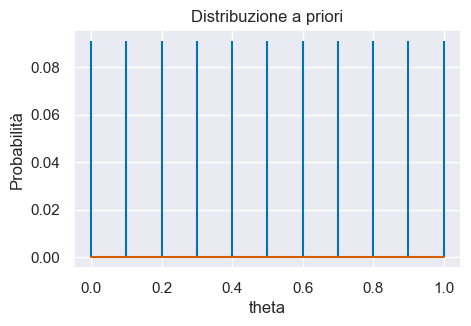

In [6]:
plt.stem(theta, unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("theta")
plt.ylabel("Probabilità")

Oppure, per qualche ragione, potremmo pensare che i valori centrali della distribuzione di $\theta$ siamo più credibili dei valori estremi. Tale opinione soggettiva può essere descritta dalla seguente distribuzione di massa di probabilità.

Text(0, 0.5, 'Probabilità')

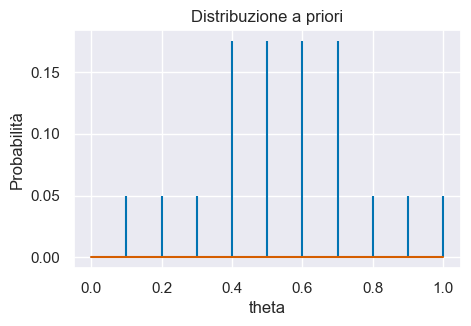

In [7]:
not_unif_distr_pdf = [0, 0.05, 0.05, 0.05, 0.175, 0.175, 0.175, 0.175, 0.05, 0.05, 0.05]
plt.stem(theta, not_unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("theta")
plt.ylabel("Probabilità")

La prima distribuzione di probabilità è chiamata distribuzione discreta uniforme perché attribuisce la stessa probabilità (ovvero, 1/10) ad ogni elemento dell'insieme discreto su cui è definita (ovvero, $0.1, 0.2, \dots, 1.0$). Anche la seconda distribuzione è discreta, ma non è uniforme: riteniamo più credibile che $\theta$ assuma un valore nell'insieme $\{0.4, 0.5, 0.6, 0.7\}$ piuttosto che nell'insieme $\{0.1, 0.2, 0.3, 0.8, 0.9, 1.0\}$.

Le credenze relative alla credibilità dei possibili valori che $\theta$ possono assumere forme diverse e corrispondono a quella che viene chiamata la *distribuzione a priori*, ovvero descrivono le credenze iniziali relative alla quantità sconosciuta di interesse.

La procedura di inferenza bayesiana "aggiorna" tali credenze a priori utilizzando le informazioni fornite da un campione di dati. Usando il teorema di Bayes, le informazioni fornite dai dati vengono combinate con le nostre credenze precedenti relative alla quantità sconosciuta $\theta$ per giungere ad una credenza detta "a posteriori".

Supponendo che i dati corrispondano all'osservazione di 12 palline rosse in 20 estrazioni con rimessa dall'urna, usiamo ora la seconda delle distribuzioni a priori descritte sopra per ottenere la distribuzione a posteriori.

Il teorema di Bayes specifica la distribuzione a posteriori come il prodotto della verosimiglianza e della distribuzione a priori, diviso per una costante di normalizzazione:

$$
p(\theta \mid y) = \frac{p(y \mid \theta)p(\theta)}{p(y)}.
$$

Per trovare la funzione di verosimiglianza, $p(y \mid \theta)$, è necessario pensare a come sono stati ottenuti i dati. I dati corrispondono ai risultati di 20 estrazioni con rimessa da un'urna. Se l'estrazione è casuale con reinserimento, allora i dati (12 successi in 20 prove) possono essere intesi come il risultato di un esperimento casuale binomiale. Usando Python, la funzione di verosimiglianza può essere generata mediante la funzione `binom.pmf()`.

In [ ]:
lk = binom.pmf(12, 20, theta)
lk

Per i 10 valori $\theta$ considerati, la funzione di verosimiglianza assume la forma indicata dalla figura seguente.

In [ ]:
plt.stem(theta, lk, markerfmt=" ")
plt.title("Funzione di verosimiglianza")
plt.xlabel("theta")
plt.ylabel("Probabilità")

Per calcolare la distribuzione a posteriori dobbiamo fare il prodotto (elemento per elemento) del vettore che contiene i valori della distribuzione a priori e del vettore che contiene i valori della funzione di verosimiglianza. Tale prodotto andrà poi diviso per una costante di normalizzazione, $p(y)$.

Per la legge della probabilità totale, il denominatore corrisponde alla probabilità marginale dei dati $y$ ed è uguale alla somma dei prodotti tra la distribuzione a priori e la funzione di verosimiglianza.

In [ ]:
np.sum(not_unif_distr_pdf * lk)

La distribuzione a posteriori di $\theta$ sarà dunque uguale al prodotto della distribuzione a priori per la verosimiglianza, diviso per la costante di normalizzazione (probabilità marginale dei dati).

In [ ]:
post = (not_unif_distr_pdf * lk) / np.sum(not_unif_distr_pdf * lk)
print(post)

Verifichiamo

In [ ]:
np.sum(post)

Esaminiamo la distribuzione a posteriori di $\theta$.

In [ ]:
plt.stem(theta, post, markerfmt=" ")
plt.title("Distribuzione a posteriori")
plt.xlabel("theta")
plt.ylabel("Probabilità")

Conoscendo la distribuzione a posteriori di $\theta$ diventa possibile calcolare altre quantità di interesse. Per esempio, la moda a posteriori di $\theta$ si ricava direttamente dal grafico precedente, e corrisponde a 0.6. La media a posteriori si trova con la formula del valore atteso delle v.c..

In [ ]:
np.sum(theta * post)

Lo stesso si può dire della varianza della distribuzione a posteriori.

In [ ]:
np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2

Usando questo metodo possiamo trovare la distribuzione a posteriori di $\theta$ nel caso di qualunque distribuzione a priori discreta.

## Inferenza bayesiana con una distribuzione a priori continua 

Il caso di una distribuzione a priori discreta è stato discusso solo per scopi didattici. In generale, l'uso di una distribuzione a priori discreta non è una buona scelta per rappresentare le nostre credenze a priori sul parametro sconosciuto. Infatti, per definizione, una distribuzione a priori discreta può rappresentare solo alcuni dei possibili valori del parametro -- nel caso discusso sopra, ad esempio, non abbiamo considerato il valore 0.55. Sembra dunque più sensato descrivere le nostre credenze a priori sul parametro utilizzando una distribuzione continua.

Cerchiamo una funzione di densità con supporto in $[0, 1]$. Il candidato naturale è fornito dalla funzione Beta. Ad esempio, possiamo valutare la funzione di densità $Beta(1, 1)$ in corrispondenza dei valori $p = 0.5$ e $p = 0.8$, che dovrebbe essere entrambi uguali a 1, e in corrispondenza di $p = 1.2$, che dovrebbe essere ugualea 0 poiché questo valore è al di fuori dell'intervallo $[ 0, 1]$.

In [ ]:
print(beta.pdf([0.5, 0.8, 1.2], 1, 1))

Valutiamo la funzione distribuzione $Beta(1, 1)$ in corrispondenza dei punti 0.5 e 0.8.

In [ ]:
print(beta.cdf([0.5, 0.8], 1, 1))

Calcoliamo la probabilità $P(0.5 < p < 0.8)$.

In [ ]:
print(beta.cdf(0.8, 1, 1) - beta.cdf(0.5, 1, 1))

Possiamo trovare i quantili della distribuzione $Beta(1, 1)$ di ordine 0.5 e 0.8.

In [ ]:
print(beta.ppf([0.5, 0.8], 1, 1))

Infine, è possibile simulare dei valori casuali dalla distribuzione $Beta(a, b)$. Se vogliamo 5 valori da una $Beta(2, 10)$, scriviamo:

In [ ]:
rng.beta(2, 10, 5)

### Quali parametri per la distribuzione Beta?

Se usiamo una distribuzione Beta per rappresentare le nostre credenze a priori sul parametro $\theta$ (probabilità di successo), allora dobbiamo porci il problema di scegliere i parametri che definiscono la distribuzione Beta che meglio rappresenta le nostre opinioni a priori. Il modo più ovvio per ottenere questo risultato è per prove ed errori. Oppure, possiamo individuare i parametri $\alpha$ e $\beta$ della distribuzione interpretando $\alpha$ come la nostra stima a priori del numero di "successi", $\beta$ come a nostra stima a priori del numero di "insuccessi" e $\alpha + \beta$ come il numero di prove del campione. Ad esempio, se pensiamo che, su 30 prove, verranno osservati 10 successi, otteniamo una $Beta(10, 20)$.

In [ ]:
a = 10
b = 20
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

plt.plot(x, beta.pdf(x, a, b), "r-", lw=2, alpha=0.6, label="beta pdf")
plt.xlabel("Valore della variabile casuale X [0, 1]")
plt.ylabel("Densità")

In alternativa, potremmo specificare la distribuzione a priori definendo la mediana e un quantile della distribuzione. Per esempio, le nostre opinioni a priori sul parametro potrebbero essere tali per cui pensiamo che la mediana della distribuzione sia 0.25 e il quantile della distribuzione di ordine 0.9 sia 0.5. In questo caso potremmo usare i parametri $\alpha = 2$ e $\beta = 5$.

In [ ]:
a = 2
b = 5
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

plt.plot(x, beta.pdf(x, a, b), "r-", lw=2, alpha=0.6, label="beta pdf")
plt.xlabel("Valore della variabile casuale X [0, 1]")
plt.ylabel("Densità")

In [ ]:
print(beta.median(2, 5))

In [ ]:
print(beta.ppf(0.9, 2, 5))

## Commenti e considerazioni finali 

In questo capitolo abbiamo introdotto la procedura dell'aggiornamento bayesiano nel caso di una distribuzione a priori discreta. Abbiamo anche anticipato alcune informazioni che si dimostreranno utili quando dovremo affrontare il caso in cui viene utilizzata una distribuzione a priori continua. Se viene utilizzata una distribuzione a priori continua, al denominatore del rapporto di Bayes troviamo un integrale che, in generale, non può essere risolto per via analitica. Il caso dell'inferenza su una proporzione, in cui la distribuzione a priori è una distribuzione Beta e la verosimiglianza è binoniale, rappresenta un'eccezione, è un caso nel quale le proprietà della distribuzione a posteriori si posso derivare per via analitica. Questo argomento verrà affrontato nel prossimo capitolo.

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w